In [1]:
!pip install tensorflow

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import tensorflow
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [5]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [7]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [8]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [9]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [10]:
x=x.drop(['Geography','Gender'],axis=1)


In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
x=pd.concat([x,geography,gender],axis=1)

In [13]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [16]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
x_train.shape

(8000, 11)

In [19]:
classifier=Sequential()

In [34]:
classifier.add(Dense(units=11,activation='relu',))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=1,activation='sigmoid'))

In [35]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [37]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [38]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8309 - loss: 0.5974 - val_accuracy: 0.8523 - val_loss: 0.3886
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8510 - loss: 0.4085 - val_accuracy: 0.8523 - val_loss: 0.3747
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8577 - loss: 0.3829 - val_accuracy: 0.8448 - val_loss: 0.3727
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8587 - loss: 0.3703 - val_accuracy: 0.8516 - val_loss: 0.3686
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8537 - loss: 0.3661 - val_accuracy: 0.8512 - val_loss: 0.3700
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8587 - loss: 0.3658 - val_accuracy: 0.8531 - val_loss: 0.3651
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8488 - loss: 0.3727 - val_accuracy: 0.8550 - val_loss: 0.3660
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8564 - loss: 0.3478 - 

In [39]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

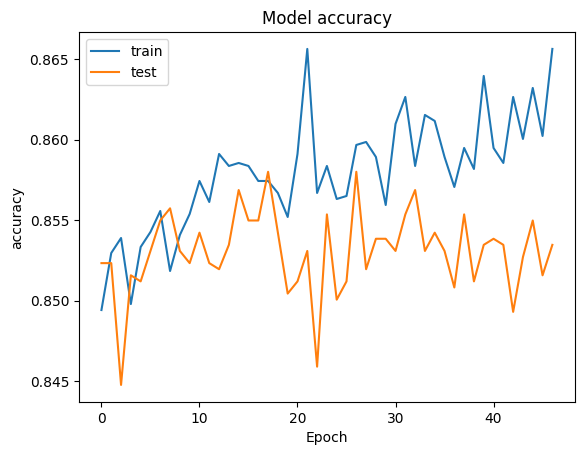

In [40]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

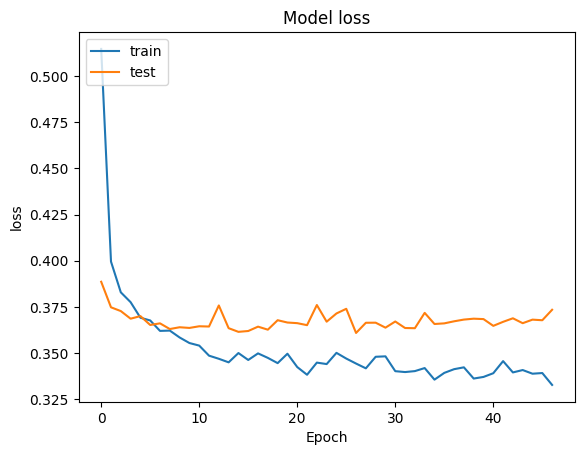

In [41]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt

In [42]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [43]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1521,   74],
       [ 224,  181]])

In [44]:
score=accuracy_score(y_pred,y_test)
score

0.851

In [45]:
classifier.get_weights()

[array([[-1.27207026e-01,  1.02169223e-01, -2.82278880e-02,
          2.40855008e-01,  1.93308622e-01,  1.55894145e-01,
          1.45770356e-01,  7.76682049e-02, -3.70934099e-01,
         -9.89290252e-02,  7.81758595e-03],
        [ 1.04111898e+00, -9.65573609e-01,  5.40024459e-01,
         -1.70768529e-01, -7.10368454e-02,  6.07327104e-01,
         -2.40253657e-03,  1.63881645e-01, -8.62707496e-01,
         -6.73540890e-01, -5.85239768e-01],
        [ 1.69952720e-01,  2.37168893e-01,  1.10640518e-01,
          2.11195081e-01,  5.67079969e-02, -2.03306958e-01,
         -1.99311361e-01, -3.36026788e-01,  6.85587883e-01,
         -2.04459086e-01, -2.58680612e-01],
        [ 7.94253722e-02,  3.71613234e-01, -9.36283886e-01,
         -5.65653965e-02, -7.33379364e-01, -2.82022655e-01,
          5.40231392e-02, -3.68244112e-01, -1.47954628e-01,
         -1.33668095e-01,  1.44766495e-01],
        [ 1.31855214e+00, -3.16335201e-01, -1.10440218e+00,
          9.90859389e-01, -3.24503541e-01, -